# Data Visualization for Online Retail Store Data

## Step 1: Import Python Modules for the Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Data

In [2]:
v3_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Data-Analysis-Projects/Analysis-of-Online-Retail-Store-Data/Exploratory-Data-Analysis/v3_df.csv"
v3_df = pd.read_csv(v3_df_url, encoding= 'unicode_escape')
v3_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,MonthYear,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,20.34


## Step 3: Validate Data Types

In [3]:
v3_df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Date            object
MonthYear       object
TotalAmount    float64
dtype: object

## Grouping the DataFrame for Visualization using `pd.groupby()`
* We can group the data based on the following:
    1. Grouping By `CustomerID`
    2. Grouping By `Country`

In [12]:
# group dataframe by Country
overall_grouped_df = v3_df.groupby(
    ['Country']
).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique'),
    CountOfCustomer = pd.NamedAgg(column='CustomerID', aggfunc='nunique'),
    CountOfInvoiceDates = pd.NamedAgg(column='Date', aggfunc='nunique')
).reset_index()

overall_grouped_df.head()

,Country,TotalAmount,CountOfInvoices,CountOfCustomer,CountOfInvoiceDates
0,Australia,138521.31,57,9,44
1,Austria,10198.68,17,11,16
2,Bahrain,548.40,2,2,2
3,Belgium,41196.34,98,25,83
4,Brazil,1143.60,1,1,1


#### Remarks
* We can use the `grouped_country_df` above to get information about:
    1. `AverageSalesValue` - Average Sales Value per Customer
    2. `AverageBasketValue` - Average sales  value per invoice generated
    3. `RevenueContribution` - Revenues contribution by each country to the overall Revenue of the 37 countries

In [14]:
def process_df(df):
    # create the following columns
    df['AverageSalesValue'] = df['TotalAmount'] / df['CountOfCustomer']
    df['AverageSalesValue'] = df['AverageSalesValue'].round().astype(int)
    
    # create the AverageBasketValue column
    df['AverageBasketValue'] = df['TotalAmount']/df['CountOfInvoices']
    df['AverageBasketValue'] = df['AverageBasketValue'].round().astype(int)
    
    # get the total Revenue
    TotalRevenue = df['TotalAmount'].sum()
    # get the Revenue Contribution
    df['RevenueContribution'] = (df['TotalAmount'] / TotalRevenue) * 100
    df['RevenueContribution'] = df['RevenueContribution'].round(1)
    
    return df

overall_grouped_df = process_df(overall_grouped_df)

# save to a csv file
overall_grouped_df.to_csv("overall_grouped_df.csv", index =False)

overall_grouped_df.head()

,Country,TotalAmount,CountOfInvoices,CountOfCustomer,CountOfInvoiceDates,AverageSalesValue,AverageBasketValue,RevenueContribution
0,Australia,138521.31,57,9,44,15391,2430,1.6
1,Austria,10198.68,17,11,16,927,600,0.1
2,Bahrain,548.40,2,2,2,274,274,0.0
3,Belgium,41196.34,98,25,83,1648,420,0.5
4,Brazil,1143.60,1,1,1,1144,1144,0.0


### `groupby()`: Date and Country
* Get the daily transaction summary by Country.

In [4]:
# Group By Date, and Country
v1_grouped_df = v3_df.groupby(
    ['Date', 'Country']
).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    AvgAmount = pd.NamedAgg(column='TotalAmount', aggfunc='mean'),
    CountOfInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique'),
    CountOfCustomer = pd.NamedAgg(column='CustomerID', aggfunc='nunique')
).reset_index()

# save to a csv file
#v1_grouped_df.to_csv("v1_grouped_df.csv", index =False)
v1_grouped_df.head()

,Date,Country,TotalAmount,AvgAmount,CountOfInvoices,CountOfCustomer
0,2010-12-01,Australia,358.25,25.589286,1,1
1,2010-12-01,EIRE,555.38,26.446667,2,1
2,2010-12-01,France,855.86,42.793000,1,1
3,2010-12-01,Germany,261.48,17.432000,1,1
4,2010-12-01,Netherlands,192.60,96.300000,1,1


### `groupby()`: YearMonth, and Country
* Generate Monthly Sales summary by Country.

In [5]:
# Group by Year-Month and Country
v2_grouped_df = v3_df.groupby(
    ['MonthYear', 'Country']
).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    AvgAmount = pd.NamedAgg(column='TotalAmount', aggfunc='mean'),
    CountOfInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique'),
    CountOfCustomer = pd.NamedAgg(column='CustomerID', aggfunc='nunique')
).reset_index()

# save to csv
# v2_grouped_df.to_csv('v2_grouped_df.csv', index = False)
v2_grouped_df.head()

,MonthYear,Country,TotalAmount,AvgAmount,CountOfInvoices,CountOfCustomer
0,2010-12,Australia,1032.85,32.276563,3,2
1,2010-12,Austria,277.20,34.650000,1,1
2,2010-12,Belgium,1809.91,19.051684,5,4
3,2010-12,Channel Islands,363.53,21.384118,1,1
4,2010-12,Cyprus,1590.82,19.166506,1,1


### `groupby()`: Date, CustomerID, and Country
* Daily sales transactions per Customer, Country.

In [6]:
# Group By Date, CustomerID, and Country
v3_grouped_df = v3_df.groupby(
    ['Date', 'CustomerID', 'Country']
).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    AvgAmount = pd.NamedAgg(column='TotalAmount', aggfunc='mean'),
    CountOfInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique')
).reset_index()

# save to a csv file
# v3_grouped_df.to_csv("v3_grouped_df.csv", index=False)

v3_grouped_df.head()

,Date,CustomerID,Country,TotalAmount,AvgAmount,CountOfInvoices
0,2010-12-01,12431.0,Australia,358.25,25.589286,1
1,2010-12-01,12433.0,Norway,1919.14,26.289589,1
2,2010-12-01,12583.0,France,855.86,42.793000,1
3,2010-12-01,12662.0,Germany,261.48,17.432000,1
4,2010-12-01,12748.0,United Kingdom,4.95,4.950000,1


### Check For Outliers: Using `Boxplot`

<Axes: >

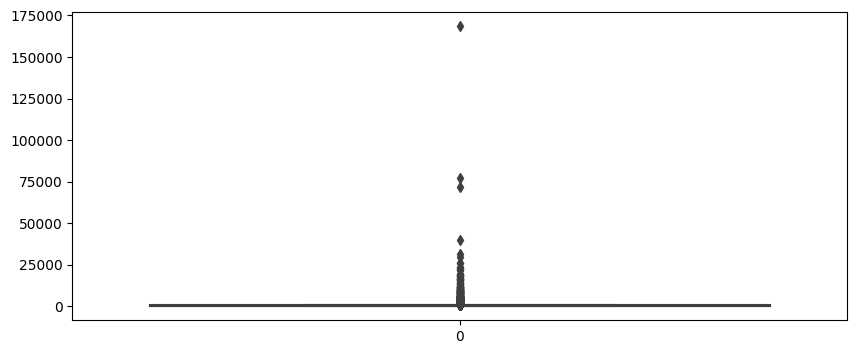

In [8]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(grouped_customer_df['TotalAmount'])

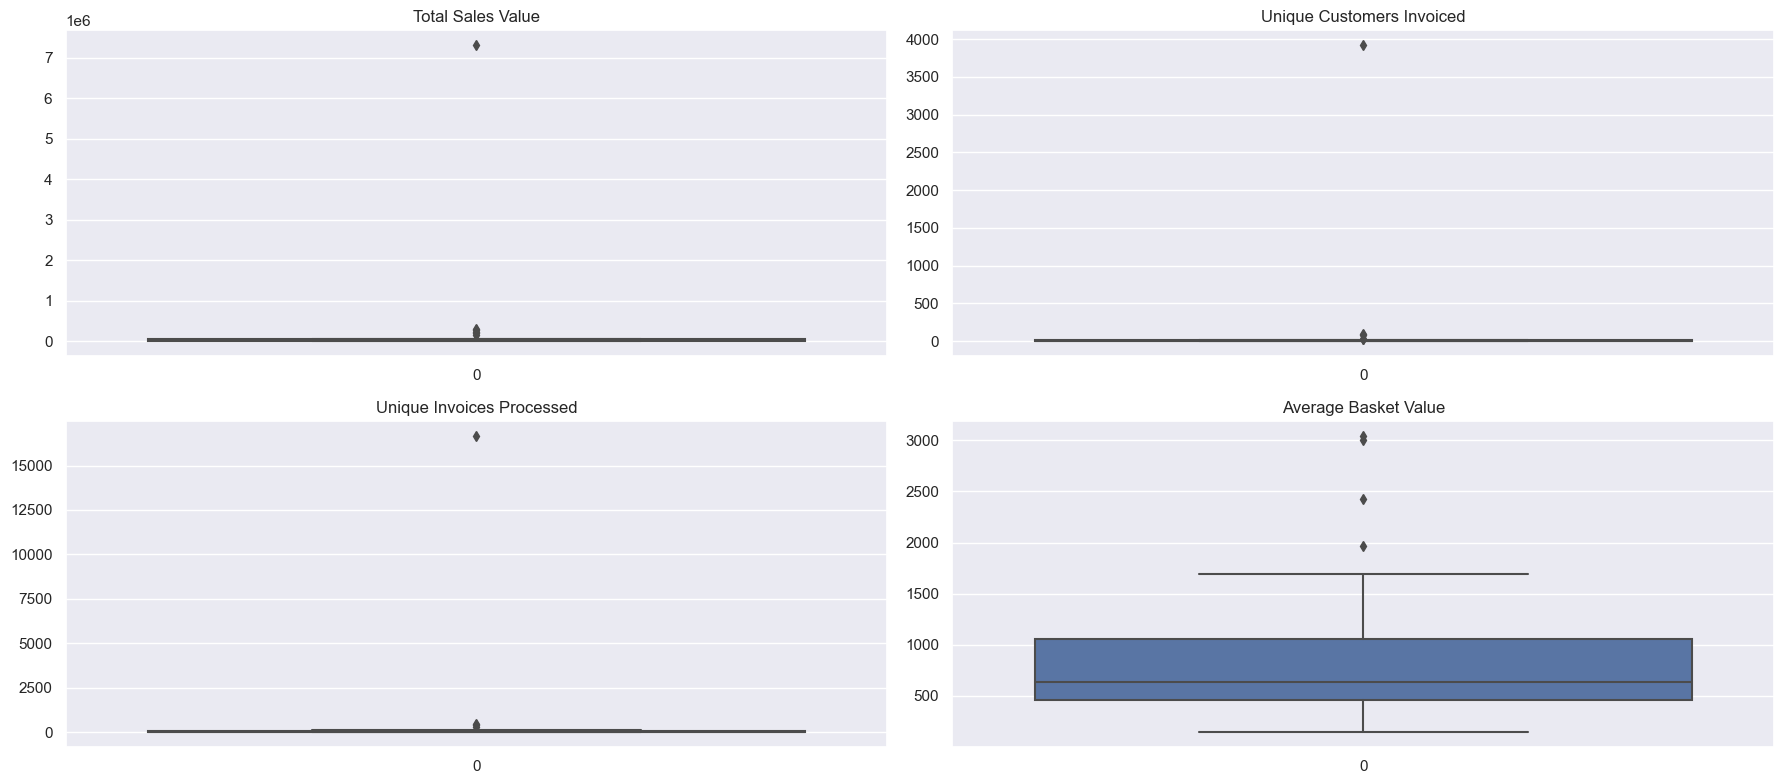

In [29]:
#set seaborn plotting aesthetics as default
sns.set()
# Define the Subplots
fig, ax = plt.subplots(2,2, figsize = (18, 8))

# TotalAmount
sns.boxplot(grouped_country_df['TotalAmount'], ax = ax[0, 0]).set(title = "Total Sales Value")
# CountOfCustomer
sns.boxplot(grouped_country_df['CountOfCustomer'], ax = ax[0, 1]).set(title = "Unique Customers Invoiced")
# CountOfInvoices
sns.boxplot(grouped_country_df['CountOfInvoices'], ax = ax[1, 0]).set(title = "Unique Invoices Processed")
# AverageBasketValue
sns.boxplot(grouped_country_df['AverageBasketValue'], ax = ax[1, 1]).set(title = "Average Basket Value")

plt.tight_layout()

### `sns.boxplot()`: Country Comparison

<Axes: xlabel='TotalAmount', ylabel='Country'>

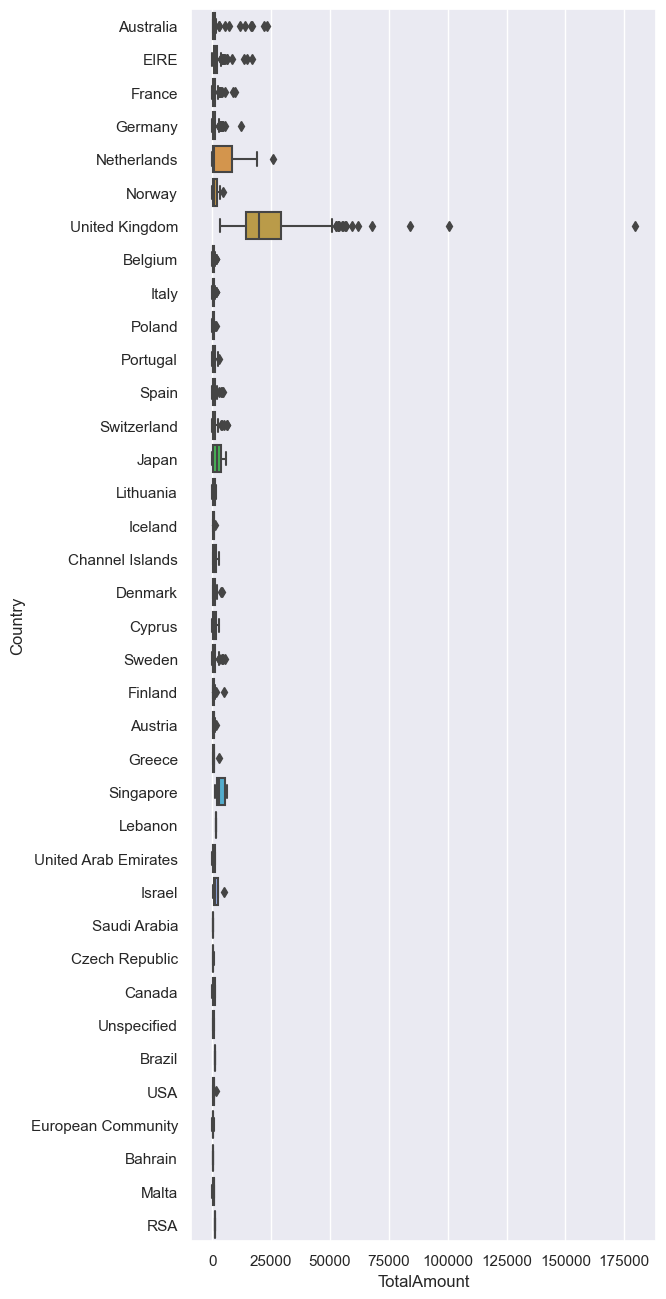

In [83]:
sns.set(rc={"figure.figsize":(6, 16)}) #width=3, #height=4
sns.boxplot(
    data = v1_grouped_df,
    x="TotalAmount",
    y="Country",
    #hue = "Country"
)

### Bivariate Analysis
### Check for Liner Relationship between Two variables using `sns.pairplot()`

* Generate a new dataframe with `Country` being used as index.

In [35]:
grouped_country_df_with_index = grouped_country_df.set_index('Country')
grouped_country_df_with_index

,TotalAmount,CountOfInvoices,CountOfCustomer,AverageSalesValue,AverageBasketValue,RevenueContribution
Country,,,,,,
Australia,138521.310,57,9,15391,2430,1.6
Austria,10198.680,17,11,927,600,0.1
Bahrain,548.400,2,2,274,274,0.0
Belgium,41196.340,98,25,1648,420,0.5
Brazil,1143.600,1,1,1144,1144,0.0
Canada,3666.380,6,4,917,611,0.0
Channel Islands,20450.440,26,9,2272,787,0.2
Cyprus,13590.380,16,8,1699,849,0.2
Czech Republic,826.740,2,1,827,413,0.0


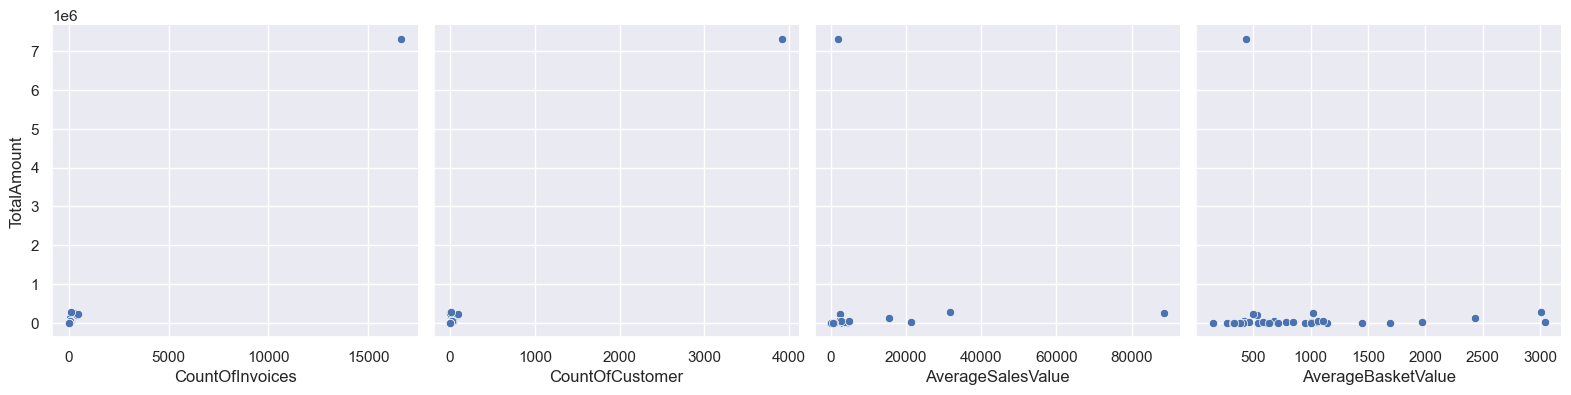

In [37]:
# check for any linear relationship between two variables
sns.pairplot(
            grouped_country_df_with_index,
             x_vars=['CountOfInvoices', 'CountOfCustomer', 'AverageSalesValue', 'AverageBasketValue'],
             y_vars=['TotalAmount'],
             height = 4,
             aspect = 1,
             kind = 'scatter' 
             )

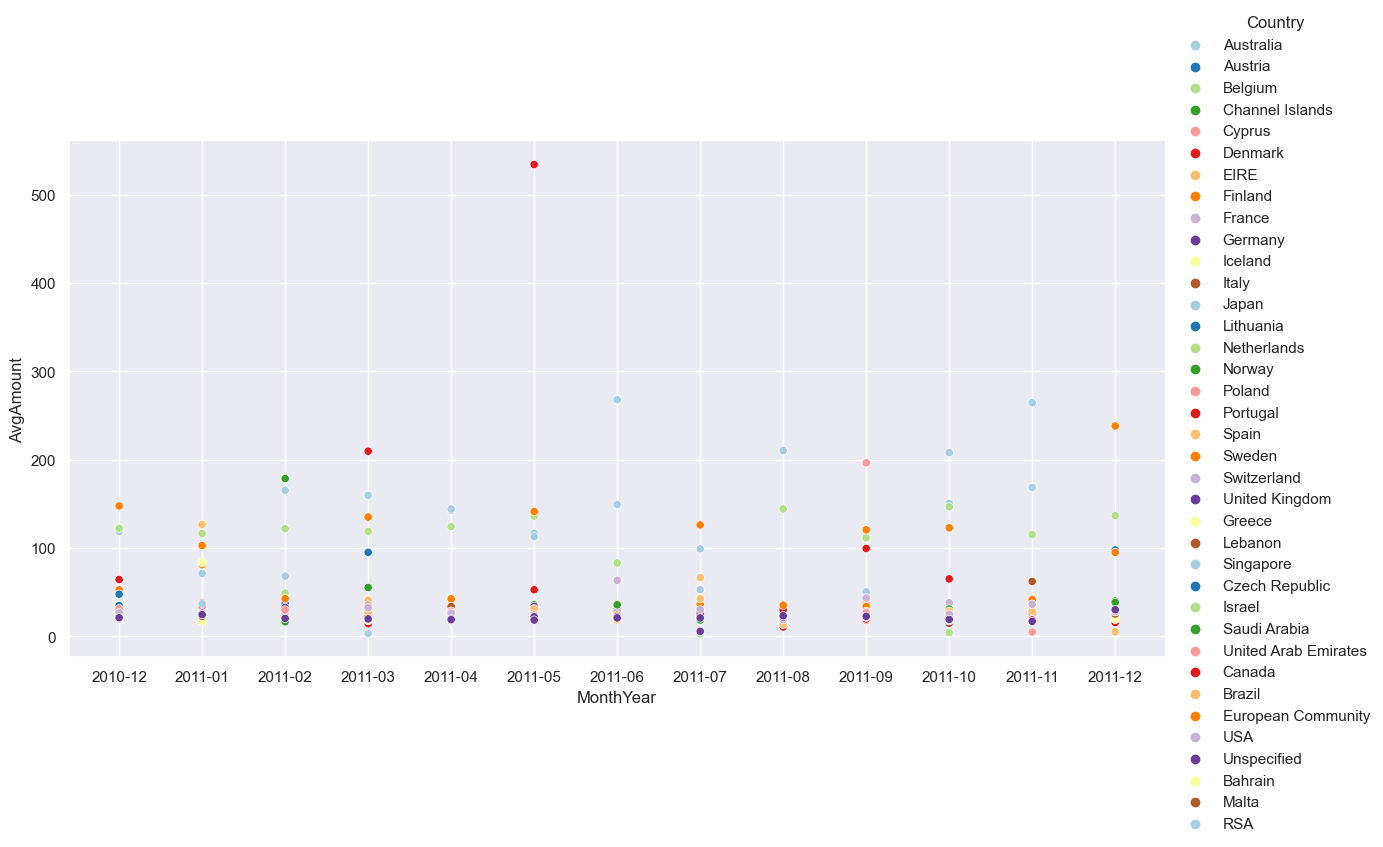

In [71]:
sns.relplot(data = v2_grouped_df,
            x = 'MonthYear', 
            y='AvgAmount',
            hue = 'Country',
            palette="Paired",
            height = 6, # height = 6
            aspect = 2 # width = 2 times larger than height
            )

### Mutivariate Analysis
* Check for correlation between variables

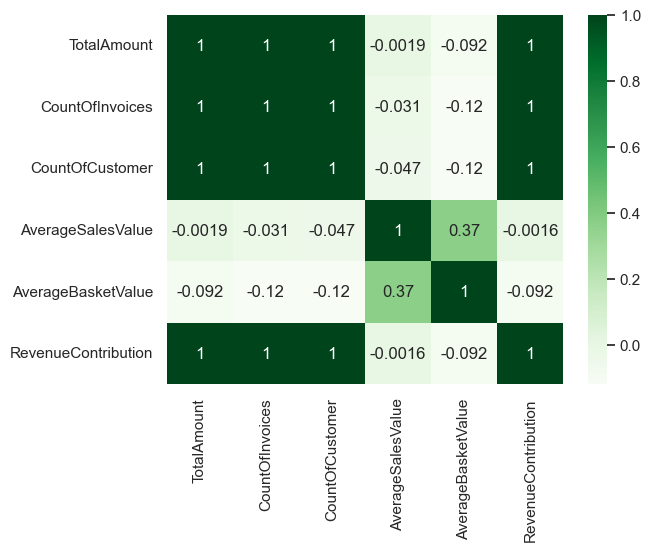

In [41]:
#
sns.heatmap(grouped_country_df_with_index.corr(), 
            cmap='Greens', 
            annot=True
            )
plt.show()